# First Name: Kaung Khant
# Last Name: Naing

# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Import Data

In [2]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

bottle = pd.read_csv('bottle.csv', low_memory=False)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,nan,25.65,...,nan,0,nan,nan,nan,nan,nan,nan,nan,NaN
1,1,2,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,nan,25.66,...,nan,8,nan,nan,nan,nan,nan,nan,nan,NaN
2,1,3,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.44,nan,25.65,...,nan,10,nan,nan,nan,nan,nan,nan,nan,NaN
3,1,4,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,nan,25.64,...,nan,19,nan,nan,nan,nan,nan,nan,nan,NaN
4,1,5,054.0 056.0,1949-03,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.42,nan,25.64,...,nan,20,nan,nan,nan,nan,nan,nan,nan,NaN


# Data management 

In [3]:
bottle['R_TEMP'] = pd.to_numeric(bottle['R_TEMP'], errors='coerce') 
bottle['R_PRES'] = pd.to_numeric(bottle['R_PRES'], errors='coerce')
bottle['R_Depth'] = pd.to_numeric(bottle['R_Depth'], errors='coerce')

In [4]:
sub1=bottle[(bottle['Cst_Cnt']<=5)]
sub2=sub1.copy()

In [5]:
bottle_clean=bottle.dropna()

# Correlation between each explantory variable and response variable (y=total_cases)

In [6]:
print ('association between Pressure in decibars and Reported Depth')
print (scipy.stats.pearsonr(sub2['R_PRES'], sub2['R_Depth']))

association between Pressure in decibars and Reported Depth
(0.9999996497614666, 0.0)


In [7]:
print ('association between Reported Temperature of Water and Reported Depth')
print (scipy.stats.pearsonr(sub2['R_TEMP'], sub2['R_Depth']))

association between Reported Temperature of Water and Reported Depth
(-0.9409113898216722, 5.218724267059692e-71)


# Scatter plot between each explantory variable and response variable

<IPython.core.display.Javascript object>


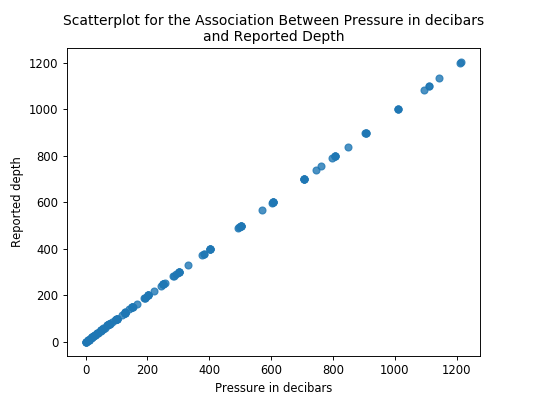

Text(0.5, 1.0, 'Scatterplot for the Association Between Pressure in decibars\nand Reported Depth')

In [8]:
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="R_PRES", y="R_Depth", fit_reg=False, data=sub2)
plt.xlabel('Pressure in decibars')
plt.ylabel('Reported depth')
plt.title('Scatterplot for the Association Between Pressure in decibars'+ '\n' + 'and Reported Depth')

<IPython.core.display.Javascript object>


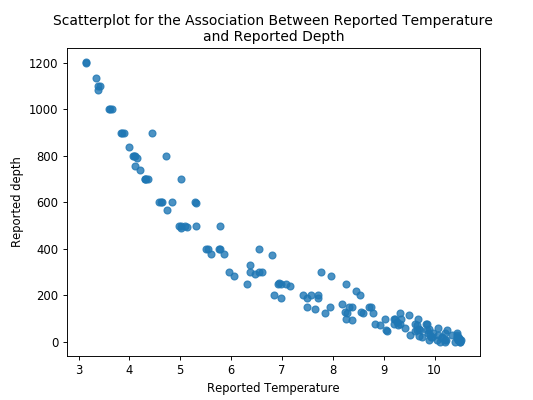

Text(0.5, 1.0, 'Scatterplot for the Association Between Reported Temperature\nand Reported Depth')

In [9]:
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="R_TEMP", y="R_Depth", fit_reg=False, data=sub2)
plt.xlabel('Reported Temperature')
plt.ylabel('Reported depth')
plt.title('Scatterplot for the Association Between Reported Temperature' + '\n' + 'and Reported Depth')

# Regression Analysis

<IPython.core.display.Javascript object>


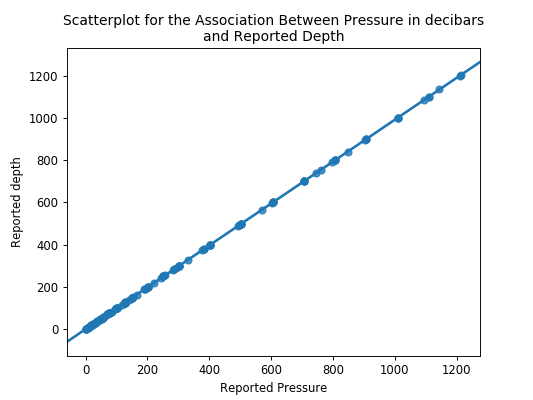

Text(0.5, 1.0, 'Scatterplot for the Association Between Pressure in decibars\nand Reported Depth')

In [10]:
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="R_PRES", y="R_Depth", fit_reg=True, data=sub2)
plt.xlabel('Reported Pressure')
plt.ylabel('Reported depth')
plt.title('Scatterplot for the Association Between Pressure in decibars'+ '\n' + 'and Reported Depth')

In [11]:
print ("OLS regression model for the association between Reported Depth and Pressure in decibars  ")
reg1 = smf.ols('R_Depth ~ R_PRES', data=sub2).fit()
print (reg1.summary())

OLS regression model for the association between Reported Depth and Pressure in decibars  
                            OLS Regression Results                            
Dep. Variable:                R_Depth   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.099e+08
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -15.562
No. Observations:                 149   AIC:                             35.12
Df Residuals:                     147   BIC:                             41.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

<IPython.core.display.Javascript object>


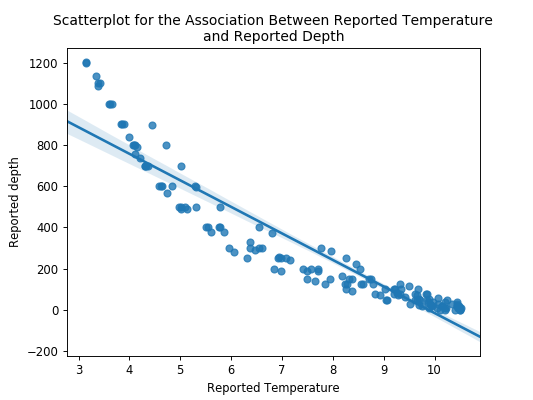

Text(0.5, 1.0, 'Scatterplot for the Association Between Reported Temperature\nand Reported Depth')

In [12]:
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="R_TEMP", y="R_Depth", fit_reg=True, data=sub2)
plt.xlabel('Reported Temperature')
plt.ylabel('Reported depth')
plt.title('Scatterplot for the Association Between Reported Temperature' + '\n' + 'and Reported Depth')

In [13]:
print ("OLS regression model for the association between Reported Depth and Reported Temperature")
reg1 = smf.ols('R_Depth ~ R_TEMP', data=sub2).fit()
print (reg1.summary())

OLS regression model for the association between Reported Depth and Reported Temperature
                            OLS Regression Results                            
Dep. Variable:                R_Depth   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           5.22e-71
Time:                        13:57:34   Log-Likelihood:                -910.00
No. Observations:                 149   AIC:                             1824.
Df Residuals:                     147   BIC:                             1830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

# qq plot 

In [14]:
sub3 = sub2[['R_TEMP', 'R_Depth', 'R_PRES']].dropna()
sub3.head()

,R_TEMP,R_Depth,R_PRES
0,10.50,0,0
1,10.46,8,8
2,10.46,10,10
3,10.45,19,19
4,10.45,20,20


In [15]:
sub3['R_TEMP'] =  (sub3['R_TEMP'] - sub3['R_TEMP'].mean())
sub3['R_Depth'] = (sub3['R_Depth'] - sub3['R_Depth'].mean())
sub3['R_PRES'] = (sub3['R_PRES'] - sub3['R_PRES'].mean())

In [16]:
reg3 = smf.ols('R_Depth ~ R_PRES + R_TEMP', data=sub3).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                R_Depth   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.395e+08
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:57:36   Log-Likelihood:                 6.1813
No. Observations:                 149   AIC:                            -6.363
Df Residuals:                     146   BIC:                             2.649
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.865e-14      0.019  -9.71e-13      1.0

<IPython.core.display.Javascript object>


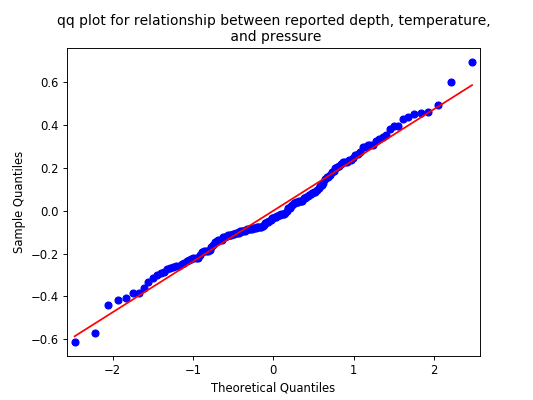

Text(0.5, 1.0, 'qq plot for relationship between reported depth, temperature,\n and pressure')

In [17]:
import statsmodels.api as sm
fig4=sm.qqplot(reg3.resid, line='r')
plt.title ('qq plot for relationship between reported depth, temperature,\n and pressure')

# standardized residual plots

<IPython.core.display.Javascript object>


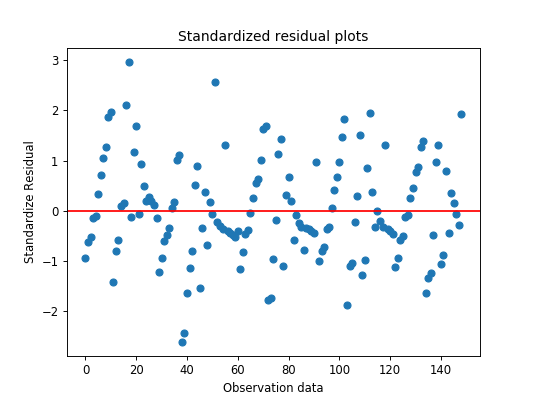

Text(0.5, 1.0, 'Standardized residual plots')

In [18]:
stdres= pd.DataFrame(reg3.resid_pearson)

plt.figure()
plt.plot(stdres, 'o', ls = 'None')
l = plt.axhline(y=0, color='r')
plt.ylabel ('Standardize Residual')
plt.xlabel ('Observation data')
plt.title ('Standardized residual plots')

In [19]:
percentage_over2sd = (np.count_nonzero( stdres[0] > 2) + np.count_nonzero( stdres[0] < -2))/len(stdres)*100
print (percentage_over2sd)

3.3557046979865772


In [20]:
percentage_over2_5sd = (np.count_nonzero( stdres[0] > 2.5) + np.count_nonzero( stdres[0] < -2.5))/len(stdres)*100
print (percentage_over2_5sd)

2.013422818791946
